## Sentimental Analysis of Reviews on Covid-19 contact tracing apps  

In [1]:
import pandas as pd
import numpy as np
import nltk

### Training Data

In [3]:
df=pd.read_csv("t2_data_train.tsv", sep='\t')

In [4]:
df.head()

,id,text,class_label
0,0,Trying to to register but showing : could not ...,1
1,1,I don’t get it it should be data free why shou...,1
2,2,"Good initiative, haven't noticed any extra bat...",0
3,3,Battery drainage and activation error messages,1
4,4,Good,0


In [17]:
df.shape

(22286, 4)

### Testing Data 

In [7]:
df1=pd.read_csv("t2_data_test.tsv", sep='\t')

In [8]:
df1.head()

,id,text,class_label
0,0,Useless. Don't bother.,1
1,1,Good,0
2,2,Says phone number invalid! Unable to complete ...,1
3,3,Very good,0
4,4,"Same with others, why it is always crashing?? ...",1


In [18]:
df1.shape

(10977, 4)

### Preprocessing 

In [11]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string

In [6]:
tokenizer=TweetTokenizer(preserve_case=False, reduce_len=True)
stopwords_english= stopwords.words('english')
stemmer= PorterStemmer()

In [12]:
def process(review):
    tokenized =tokenizer.tokenize(review)
    cleaned=[]
    for word in tokenized:
        if (word not in stopwords_english and word not in string.punctuation):
            cleaned.append(word)
    
    stemmed=[]
    for word in cleaned:
        stem_word= stemmer.stem(word)
        stemmed.append(stem_word)            
    return stemmed

In [13]:
process("It is quite a useless app")

['quit', 'useless', 'app']

In [14]:
df["text_cleaned"]=df["text"].apply(process)

In [15]:
df.head()

,id,text,class_label,text_cleaned
0,0,Trying to to register but showing : could not ...,1,"[tri, regist, show, could, get, apikey, pleas,..."
1,1,I don’t get it it should be data free why shou...,1,"[’, get, data, free, pay, data, eat, data, loo..."
2,2,"Good initiative, haven't noticed any extra bat...",0,"[good, initi, notic, extra, batteri, drain]"
3,3,Battery drainage and activation error messages,1,"[batteri, drainag, activ, error, messag]"
4,4,Good,0,[good]


In [16]:
df1["text_cleaned"]=df1["text"].apply(process)

In [19]:
df1.head()

,id,text,class_label,text_cleaned
0,0,Useless. Don't bother.,1,"[useless, bother]"
1,1,Good,0,[good]
2,2,Says phone number invalid! Unable to complete ...,1,"[say, phone, number, invalid, unabl, complet, ..."
3,3,Very good,0,[good]
4,4,"Same with others, why it is always crashing?? ...",1,"[other, alway, crash, normal, use, br, use, pl..."


In [20]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),lowercase=False)

In [22]:
cleaned=df["text_cleaned"].tolist()    

In [23]:
cl=[]
for review in cleaned:
    a=" ".join([str(elem) for elem in review])
    cl.append(a)

In [24]:
cleaned1=df1["text_cleaned"].tolist()  

In [25]:
cl1=[]
for review in cleaned1:
    a=" ".join([str(elem) for elem in review])
    cl1.append(a)

### Defining testing and training data 

In [26]:
xtrain=cl

In [28]:
xtest=cl1

In [30]:
ytrain= df["class_label"]
ytest= df1["class_label"]

In [33]:
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)

### Naive Bayes Classifier 

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
naive= MultinomialNB()
naive.fit(xtrain,ytrain)

MultinomialNB()

In [47]:
yhat = naive.predict(xtest)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

matrix = confusion_matrix(ytest,yhat)
print(matrix)
print('The model accuracy is {}'.format(round(accuracy_score(ytest,yhat),3)))

[[4363  844]
 [ 179 5591]]
The model accuracy is 0.907


In [38]:
import seaborn as sns

C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


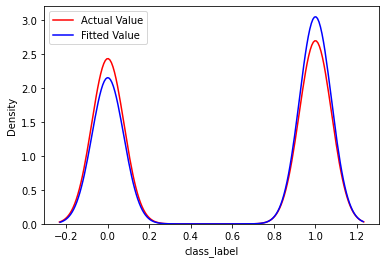

In [52]:
ax1=sns.distplot(df1["class_label"],hist=False, color='r', label="Actual Value")
sns.distplot(yhat, hist=False, color='b',label="Fitted Value",ax=ax1)
ax1.legend()

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
mean_squared_error(df1['class_label'],yhat)

0.09319486198414867

In [56]:
naive.score(xtrain,ytrain)

0.9606479404110204

### Logistic Regression 

In [57]:
from sklearn.linear_model import LogisticRegression 

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [60]:
yhat1= lr.predict(xtest)

In [61]:
matrix1 = confusion_matrix(ytest,yhat1)
print(matrix1)
print('The model accuracy is {}'.format(round(accuracy_score(ytest,yhat1),3)))

[[4520  687]
 [ 268 5502]]
The model accuracy is 0.913


C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


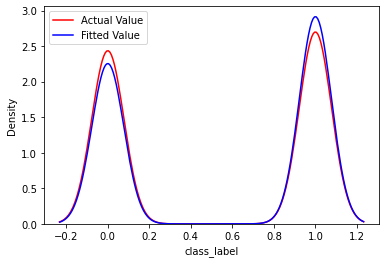

In [62]:
ax2=sns.distplot(df1["class_label"],hist=False, color='r', label="Actual Value")
sns.distplot(yhat1, hist=False, color='b',label="Fitted Value",ax=ax2)
ax2.legend()

In [63]:
mean_squared_error(df1['class_label'],yhat1)

0.08700009109957184

In [64]:
lr.score(xtrain,ytrain)

0.9413981872027282

### Decision Tree Classifier 

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
clf=DecisionTreeClassifier()

In [67]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [68]:
yhat2=clf.predict(xtest)

In [69]:
matrix2 = confusion_matrix(ytest,yhat2)
print(matrix2)
print('The model accuracy is {}'.format(round(accuracy_score(ytest,yhat2),3)))

[[4617  590]
 [ 727 5043]]
The model accuracy is 0.88


C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


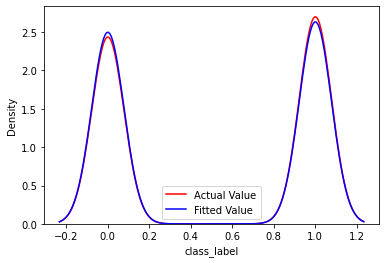

In [70]:
ax3=sns.distplot(df1["class_label"],hist=False, color='r', label="Actual Value")
sns.distplot(yhat2, hist=False, color='b',label="Fitted Value",ax=ax3)
ax3.legend()

In [71]:
mean_squared_error(df1['class_label'],yhat2)

0.11997813610276031

In [72]:
clf.score(xtrain,ytrain)

0.991429597056448

### SVM Classifier

In [73]:
from sklearn import svm

In [74]:
model = svm.SVC(C=100,kernel='rbf',gamma=0.01)

In [75]:
model.fit(xtrain, ytrain)

SVC(C=100, gamma=0.01)

In [76]:
yhat3=model.predict(xtest)

In [77]:
matrix4 = confusion_matrix(ytest,yhat3)
print(matrix4)
print('The model accuracy is {}'.format(round(accuracy_score(ytest,yhat3),3)))

[[4647  560]
 [ 344 5426]]
The model accuracy is 0.918


C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


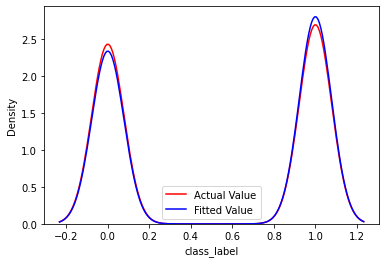

In [78]:
ax4=sns.distplot(df1["class_label"],hist=False, color='r', label="Actual Value")
sns.distplot(yhat3, hist=False, color='b',label="Fitted Value",ax=ax4)
ax4.legend()

In [80]:
mean_squared_error(df1['class_label'],yhat3)

0.0823540129361392

In [81]:
model.score(xtrain,ytrain)

0.9902629453468546

### Random Forest Classifier 

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
cf = RandomForestClassifier(n_estimators=100,criterion='entropy')

In [84]:
cf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy')

In [85]:
yhat4=cf.predict(xtest)

In [86]:
matrix5 = confusion_matrix(ytest,yhat4)
print(matrix5)
print('The model accuracy is {}'.format(round(accuracy_score(ytest,yhat4),3)))

[[4450  757]
 [ 232 5538]]
The model accuracy is 0.91


C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


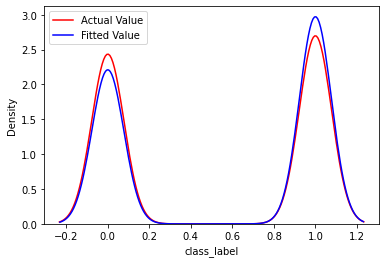

In [87]:
ax5=sns.distplot(df1["class_label"],hist=False, color='r', label="Actual Value")
sns.distplot(yhat4, hist=False, color='b',label="Fitted Value",ax=ax5)
ax5.legend()

In [88]:
mean_squared_error(df1['class_label'],yhat4)

0.09009747654186025

In [89]:
cf.score(xtrain,ytrain)

0.991429597056448

In [90]:
df3=pd.DataFrame()

In [91]:
df3["Classifiers"]=["Naive Bayes","Logistic Regression","Decision Tree","SVM","Random Forest"]

In [93]:
df3["Mean Square Error"]=[mean_squared_error(df1['class_label'],yhat),mean_squared_error(df1['class_label'],yhat1),mean_squared_error(df1['class_label'],yhat2),mean_squared_error(df1['class_label'],yhat3),mean_squared_error(df1['class_label'],yhat4)]

In [94]:
df3["$R^2$"]=[naive.score(xtrain,ytrain),lr.score(xtrain,ytrain),clf.score(xtrain,ytrain),model.score(xtrain,ytrain),cf.score(xtrain,ytrain)]

In [96]:
df3["Accuracy"]=[round(accuracy_score(ytest,yhat),3),round(accuracy_score(ytest,yhat1),3),round(accuracy_score(ytest,yhat2),3),round(accuracy_score(ytest,yhat3),3),round(accuracy_score(ytest,yhat4),3)]

In [97]:
df3

,Classifiers,Accuracy,Mean Square Error,$R^2$
0,Naive Bayes,0.907,0.093195,0.960648
1,Logistic Regression,0.913,0.087000,0.941398
2,Decision Tree,0.880,0.119978,0.991430
3,SVM,0.918,0.082354,0.990263
4,Random Forest,0.910,0.090097,0.991430


### We can choose either 'SVM' or 'Random Forest' since their values are almost the same.

### Predicting with our own review

In [98]:
rev="This app is slow and overall average."

In [103]:
pred=cf.predict(vectorizer.transform(process(rev)))

In [109]:
pred

array([1, 1, 1, 0], dtype=int64)

In [106]:
process(rev)

['app', 'slow', 'overal', 'averag']

In [110]:
def prediction(rev):
    pred=cf.predict(vectorizer.transform(process(rev))) #The model is used here!
    length=len(pred)
    sum_=0
    for i in range(0,length):
        sum_ += pred[i]
    number=sum_/length
    if number>0.5:
        return "Negative Sentiment"
    elif number<0.5:
        return "Positive Sentiment"
    else :
        return "Neutral Sentiment"

In [111]:
prediction(rev)

'Negative Sentiment'

In [112]:
rev1="This app hangs at times and makes the phone lag too. But that happens 1 out of 5 times. So i would say overall it is helpful."

In [113]:
prediction(rev1)

'Negative Sentiment'

### Visualizing  

In [115]:
df4=pd.concat([df,df1])

In [117]:
df4.shape

(33263, 4)

In [123]:
df5=df4["class_label"].value_counts().rename_axis("sentiment").to_frame("counts")

In [120]:
import matplotlib.pyplot as plt

In [124]:
df5

,counts
sentiment,
1,17676
0,15587


In [129]:
df5.reset_index(level=0,inplace=True)

In [132]:
df5["sentiment"]=df5["sentiment"].replace([1,0],["Negative","Positive"])

In [133]:
df5

,sentiment,counts
0,Negative,17676
1,Positive,15587


<BarContainer object of 2 artists>

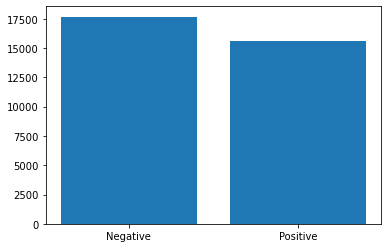

In [134]:
plt.bar(df5["sentiment"],df5["counts"])

### Given data contains more number of negative tweets.

In [135]:
import wordcloud

In [136]:
from wordcloud import WordCloud

In [147]:
chart=WordCloud(background_color='white',max_words=200,stopwords=stopwords_english)
textt=" ".join(rev for rev in df4["text"])
chart.generate(textt)

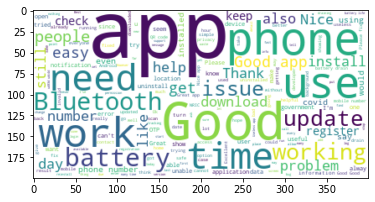

In [148]:
plt.imshow(chart,interpolation='bilinear')